In [1]:
from cifar10_base import Net
from common import get_dst_device
from modelhelper import print_model_summary
device = get_dst_device()
model = Net().to(device)
print_model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,248
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
         Dropout2d-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           1,056
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
        Dropout2d-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 32,

In [2]:
from dataloader import setup_test_loader, setup_train_loader
from plots import plot_data
from torchvision import transforms
train_transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

test_transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
train_loader = setup_train_loader("data", train_transforms)
test_loader = setup_test_loader("data", test_transforms)

Files already downloaded and verified
Files already downloaded and verified


Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


  0%|          | 0/391 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for float

torch.Size([128, 3, 32, 32])
arg max
tensor([[[-1.5955, -1.5955, -1.5761,  ..., -1.7312, -1.7312, -1.7312],
         [-1.5955, -1.5955, -1.5761,  ..., -1.7312, -1.7312, -1.7312],
         [-1.5955, -1.5955, -1.5761,  ..., -1.7312, -1.7312, -1.7312],
         ...,
         [-1.3823, -1.4017, -1.4017,  ..., -1.5761, -1.5761, -1.5761],
         [-1.4017, -1.4017, -1.4017,  ..., -1.5567, -1.5567, -1.5761],
         [-1.4017, -1.4211, -1.4211,  ..., -1.5374, -1.5374, -1.5374]],

        [[-1.8479, -1.8479, -1.8282,  ..., -1.9463, -1.9463, -1.9463],
         [-1.8479, -1.8479, -1.8282,  ..., -1.9463, -1.9463, -1.9463],
         [-1.8479, -1.8479, -1.8282,  ..., -1.9463, -1.9463, -1.9463],
         ...,
         [-1.7102, -1.7102, -1.7299,  ..., -1.9069, -1.9069, -1.9069],
         [-1.7299, -1.7299, -1.7299,  ..., -1.8873, -1.8873, -1.9069],
         [-1.7299, -1.7496, -1.7496,  ..., -1.9069, -1.9266, -1.9266]],

        [[-1.3434, -1.3629, -1.3434,  ..., -1.4800, -1.4800, -1.4800],
        

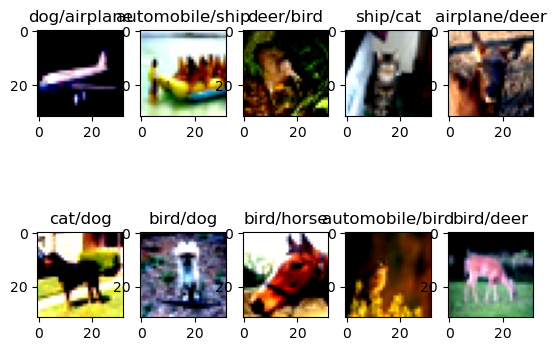

Train: Loss=2.3829 Batch_id=9 Accuracy=11.48:   3%|▎         | 10/391 [00:18<11:30,  1.81s/it]


KeyboardInterrupt: 

In [3]:
import torch.optim as optim
import torch.nn.functional as F
from modelhelper import train_model, test_model
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20
train_loss_per_epoch = []
test_loss_per_epoch = []
train_accuracy_per_epoch = []
test_accuracy_per_epoch = []
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  [train_accuracy, train_loss] = train_model(model, device, train_loader, optimizer, criterion)
  train_accuracy_per_epoch.append(train_accuracy)
  train_loss_per_epoch.append(train_loss)

  [test_accuracy, test_loss] = test_model(model, device, test_loader, criterion)
  test_accuracy_per_epoch.append(train_accuracy)
  test_loss_per_epoch.append(train_loss)

  scheduler.step()